In [1]:
from qiskit.circuit import QuantumCircuit
from qiskit.transpiler import generate_preset_pass_manager
from qiskit import transpile
from qiskit import QuantumCircuit, qasm3
import math
import mpmath
from pygridsynth.gridsynth import gridsynth_gates


In [19]:
import numpy as np
from math import pi

from qiskit import QuantumCircuit
from qiskit.circuit.library import (
    QFT,
    DiagonalGate,
    UnitaryGate,
    PauliEvolutionGate,
)
from qiskit.quantum_info import SparsePauliOp


# ---------- Task 1: Controlled-Y ----------
# PDF: Controlled-Y sanity check :contentReference[oaicite:3]{index=3}
def task1():
    qc = QuantumCircuit(2, name="task1_controlled_Y")
    qc.cy(0, 1)  # control=0, target=1
    return qc


# ---------- Task 2: Controlled-Ry(pi/7) ----------
# PDF: Controlled-Ry(pi/7) :contentReference[oaicite:4]{index=4}
def task2():
    qc = QuantumCircuit(2, name="task2_controlled_Ry_pi_over_7")
    qc.cry(pi / 7, 0, 1)
    return qc


# ---------- Task 3: exp(i * (pi/7) * (Z ⊗ Z)) ----------
# PDF: exp(i*pi/7 * Z⊗Z) :contentReference[oaicite:5]{index=5}
# Qiskit: rzz(λ) = exp(-i*λ/2*ZZ) => choose λ = -2*(pi/7)
def task3():
    qc = QuantumCircuit(2, name="task3_exp_i_pi7_ZZ")
    qc.rzz(-2 * (pi / 7), 0, 1)
    return qc


# ---------- Task 4: exp(i * (pi/7) * (XX + YY)) ----------
# PDF: H1 = XX + YY, exp(i*pi/7*H1) :contentReference[oaicite:6]{index=6}
# XX and YY commute, so exp(i a (XX+YY)) = exp(i a XX) exp(i a YY)
# rxx(λ)=exp(-i*λ/2*XX) -> λ=-2a; ryy similarly.
def task4():
    a = pi / 7
    qc = QuantumCircuit(2, name="task4_exp_i_pi7_XX_plus_YY")
    qc.rxx(-2 * a, 0, 1)
    qc.ryy(-2 * a, 0, 1)
    return qc


# ---------- Task 5: exp(i * (pi/2) * (XX + YY + ZZ)) ----------
# PDF: H2 = XX + YY + ZZ, exp(i*pi/2*H2) :contentReference[oaicite:7]{index=7}
# XX, YY, ZZ commute pairwise, so factor into three rotations.
def task5():
    a = pi / 2
    qc = QuantumCircuit(2, name="task5_exp_i_pi2_XX_YY_ZZ")
    qc.rxx(-2 * a, 0, 1)  # = rxx(-pi)
    qc.ryy(-2 * a, 0, 1)  # = ryy(-pi)
    qc.rzz(-2 * a, 0, 1)  # = rzz(-pi)
    return qc


# ---------- Task 6: exp(i * (pi/7) * (XX + ZI + IZ)) ----------
# PDF: H3 = XX + ZI + IZ, exp(i*pi/7*H3) :contentReference[oaicite:8]{index=8}
# Terms don't all commute, so use an evolution gate: PauliEvolutionGate implements exp(-i t H).
# Set t = -(pi/7) to get exp(+i*pi/7*H).
def task6():
    H = SparsePauliOp.from_list([("XX", 1.0), ("ZI", 1.0), ("IZ", 1.0)])
    qc = QuantumCircuit(2, name="task6_exp_i_pi7_XX_plus_ZI_plus_IZ")
    qc.append(PauliEvolutionGate(H, time=-(pi / 7)), [0, 1])
    return qc


# ---------- Task 7: State preparation (map |00> to given state) ----------
# PDF gives target amplitudes (seed=42 statevector) :contentReference[oaicite:9]{index=9} :contentReference[oaicite:10]{index=10}
def task7():
    psi = np.array([
        0.1061479384 - 0.6796414670j,
       -0.3622775887 - 0.4536131360j,
        0.2614190429 + 0.0445330969j,
        0.3276449279 - 0.1101628411j
    ], dtype=complex)

    qc = QuantumCircuit(2, name="task7_state_prep")
    # initialize prepares the state from |00>
    qc.initialize(psi, [0, 1])
    return qc


# ---------- Task 8: Structured unitary 1 ----------
# PDF matrix is exactly the 2-qubit QFT (up to the usual qubit-order conventions) :contentReference[oaicite:11]{index=11}
# Use built-in QFT gate. do_swaps=False matches the “no bit-reversal swap” version.
def task8():
    qc = QuantumCircuit(2, name="task8_structured_unitary_1_QFT2")
    qc.append(QFT(2, do_swaps=False), [0, 1])
    return qc


# ---------- Task 9: Structured unitary 2 ----------
# PDF prints a 4x4 matrix, but as written it is NOT unitary (column norms / orthogonality fail). :contentReference[oaicite:12]{index=12}
# There isn’t a meaningful “built-in gate” for a non-unitary.
# If you still want a literal translation, we can only represent it as a UnitaryGate with input checks disabled.
def task9_as_printed_nonunitary():
    U9_pdf = np.array([
        [1, 0, 0, 0],
        [1, 0, (-1 + 1j)/2, (1 + 1j)/2],
        [1, 1j, 0, 0],
        [1, 1j, (-1 + 1j), 0],
    ], dtype=complex)

    qc = QuantumCircuit(2, name="task9_as_printed_nonunitary")
    qc.append(UnitaryGate(U9_pdf, label="U9(pdf)", check_input=False), [0, 1])
    return qc


# ---------- Task 10: Random unitary (seed=42) ----------
# PDF provides explicit 4x4 matrix :contentReference[oaicite:13]{index=13} :contentReference[oaicite:14]{index=14}
def task10():
    # U10 = np.array([
    #     [0.1448081895 + 0.1752383997j, -0.5189281551 - 0.5242425896j, -0.1495585824 + 0.3127549990j,  0.1691348143 - 0.5053863118j],
    #     [-0.9271743926 - 0.0878506193j, -0.1126033063 - 0.1818584963j,  0.1225587186 + 0.0964028611j, -0.2449850904 - 0.0504584131j],
    #     [-0.0079842758 - 0.2035507051j, -0.3893205530 - 0.0518092515j,  0.2605170566 + 0.3286402481j,  0.4451730754 + 0.6558933250j],
    #     [0.0313792249 + 0.1961395216j,  0.4980474972 + 0.0884604926j,  0.3407886532 + 0.7506609982j,  0.0146480652 - 0.1575584270j],
    # ], dtype=complex)
    
    qc = QuantumCircuit(2, name="task10_random_unitary_seed42")

    qc.append(qiskit.quantum_info.random_unitary(4,seed=42), [0, 1])
    return qc


# ---------- Task 11: 4-qubit diagonal unitary with phases phi(x) ----------
# PDF lists phi(x) for all 16 bitstrings :contentReference[oaicite:15]{index=15}
# Use DiagonalGate with entries exp(i*phi(x)).
def task11():
    phi = {
        "0000": 0,
        "0001": pi,
        "0010": 5*pi/4,
        "0011": 7*pi/4,
        "0100": 5*pi/4,
        "0101": 7*pi/4,
        "0110": 3*pi/2,
        "0111": 3*pi/2,
        "1000": 5*pi/4,
        "1001": 7*pi/4,
        "1010": 3*pi/2,
        "1011": 3*pi/2,
        "1100": 3*pi/2,
        "1101": 3*pi/2,
        "1110": 7*pi/4,
        "1111": 5*pi/4,
    }

    diag = [np.exp(1j * phi[f"{k:04b}"]) for k in range(16)]

    qc = QuantumCircuit(4, name="task11_4q_diagonal_phase")
    qc.append(DiagonalGate(diag), [0, 1, 2, 3])
    return qc


# ---------- Collect all ----------
circuits = {
    1: task1(),
    2: task2(),
    3: task3(),
    4: task4(),
    5: task5(),
    6: task6(),
    7: task7(),
    8: task8(),
    9: task9_as_printed_nonunitary(),  # non-unitary as printed in the PDF
    10: task10(),
    11: task11(),
}

# Example usage:
# print(circuits[1].draw())
# circuits[8].decompose().draw()


/tmp/ipykernel_137411/3455061999.py:95: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(2, do_swaps=False), [0, 1])


In [24]:

def save_qasm(qc, output="qc.qasm3"):
    qasm3_str = qasm3.dumps(qc)
    
    print("OpenQASM 3 Output:\n")
    #print(qasm3_str)
    
    with open(output, "w") as file:
        file.write(qasm3_str)

    print(f"\nCircuit successfully saved to {output}")

In [4]:
def transpile_clifford_t(qc):
    clifford_t = transpile(
    qc,
    basis_gates=["cx", "h", "s", "sdg", "t", "tdg"],
    optimization_level=1,
)
    return clifford_t


Drawing Circuit 1:


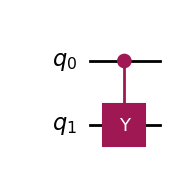

Drawing Circuit 2:


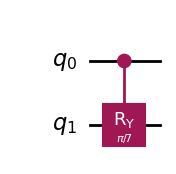

Drawing Circuit 3:


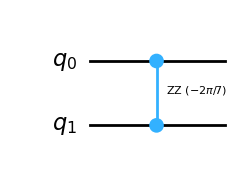

Drawing Circuit 4:


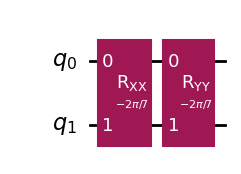

Drawing Circuit 5:


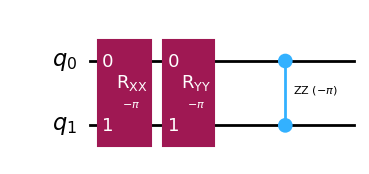

Drawing Circuit 6:


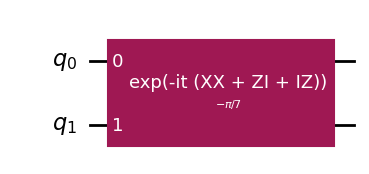

Drawing Circuit 7:


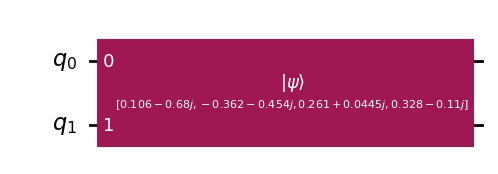

Drawing Circuit 8:


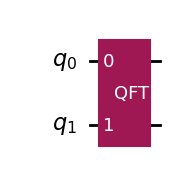

Drawing Circuit 9:


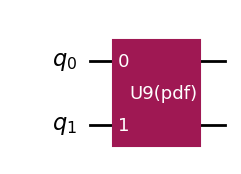

Drawing Circuit 10:


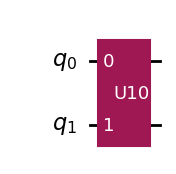

Drawing Circuit 11:


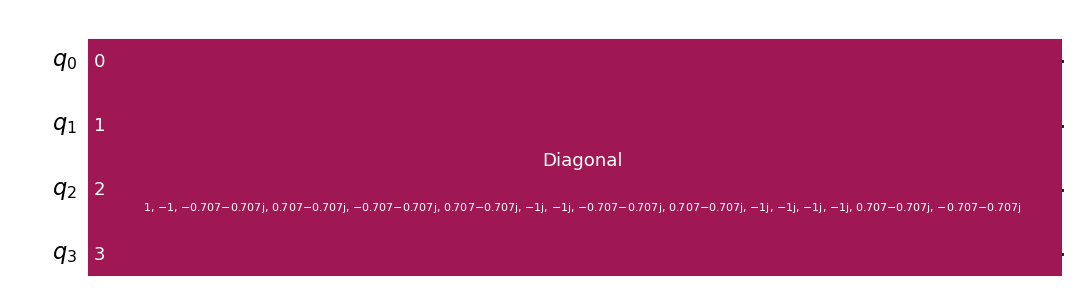

In [5]:
for index, qc in circuits.items():
    print(f"Drawing Circuit {index}:")
    # 'mpl' creates a high-quality Matplotlib visualization
    display(qc.draw(output='mpl'))

In [6]:
from qiskit.quantum_info import Operator
from qiskit.visualization import array_to_latex

for index, qc in circuits.items():
    print(f"Matrix for Circuit {index}:")
    
    # Convert the circuit to an operator
    matrix = Operator(qc).data
    
    # Display as a formatted LaTeX matrix
    display(array_to_latex(matrix))

Matrix for Circuit 1:


MissingOptionalLibraryError: "The 'sympy' library is required to use 'Create a latex representation of a ket expression'. You can install it with 'pip install sympy'."

In [ ]:
transpiled = transpile_clifford_t(circuits[1])
display(transpiled.draw("mpl"))


In [ ]:
import math
qc = QuantumCircuit(2)
qc.cry(math.pi/7, 0,1)
transpiled = transpile_clifford_t(qc)
display(transpiled.draw("mpl"))

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler.passes.synthesis import SolovayKitaev
from qiskit.transpiler import PassManager

qc = QuantumCircuit(2)
qc.cry(math.pi/7,0,1)

# 1) Decompose high-level gates first
qc = qc.decompose(reps=10)

# 2) Approximate 1-qubit unitaries into Clifford+T (if needed)
pm = PassManager([SolovayKitaev(recursion_degree=3)])  # tune degree/epsilon as needed
qc_sk = pm.run(qc)

# 3) Rebase to Clifford+T + CX
qc_ct = transpile(qc_sk, basis_gates=['h','s','t','tdg','cx'], optimization_level=3)

In [ ]:
import mpmath

from pygridsynth.multi_qubit_unitary_approximation import (
    approximate_multi_qubit_unitary,
)

# Define a target unitary matrix (example: 2-qubit identity)
num_qubits = 2
U = mpmath.eye(2**num_qubits)  # 4x4 identity matrix
epsilon = mpmath.mpf("0.001")

# Approximate the unitary
circuit, U_approx = approximate_multi_qubit_unitary(U, num_qubits, epsilon)

print(f"Circuit length: {len(circuit)}")
print(f"Circuit: {str(circuit)}")

In [ ]:
import mpmath
import qiskit.circuit
from qiskit.quantum_info import Operator

import numpy as np

from pygridsynth.mixed_synthesis import mixed_synthesis_parallel

psi = np.array([
    0.1061479384 - 0.6796414670j,
   -0.3622775887 - 0.4536131360j,
    0.2614190429 + 0.0445330969j,
    0.3276449279 - 0.1101628411j
], dtype=complex)

circ = QuantumCircuit(2)
gate = qiskit.circuit.library.StatePreparation(psi)

# Generate a random SU(2^n) unitary matrix
num_qubits = 2
unitary = Operator(gate).data

# Parameters
eps = 1e-1  # Error tolerance
M = 64  # Number of Hermitian operators for perturbation
seed = 123  # Random seed for reproducibility

# For faster computation with multiple cores
result = mixed_synthesis_parallel(unitary, num_qubits, eps, M, seed=seed)
print(result[0])

In [ ]:
from qiskit import QuantumCircuit

import numpy as np
from rmsynth import Optimizer
from rmsynth import Circuit
from qiskit.circuit.library import StatePreparation
from qiskit.quantum_info import Operator


psi = np.array([
    0.1061479384 - 0.6796414670j,
   -0.3622775887 - 0.4536131360j,
    0.2614190429 + 0.0445330969j,
    0.3276449279 - 0.1101628411j
], dtype=complex)

qc = QuantumCircuit(2)
qc.append(StatePreparation(psi, normalize=True), [0, 1])

circuit = Circuit.
opt = Optimizer(decoder="rpa", effort=3, policy="distance+depth", policy_lambda=5)
new_circ, rep = opt.optimize(qc)

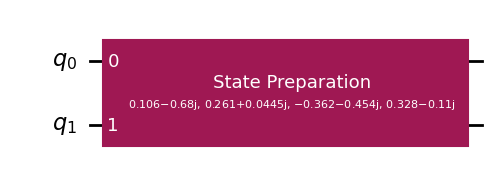

OrderedDict([('h', 720), ('t', 717), ('s', 389), ('cx', 1)])

In [13]:
from qiskit import QuantumCircuit

import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import StatePreparation
from qiskit.transpiler.passes.synthesis import UnitarySynthesis


psi = np.array([
    0.1061479384 - 0.6796414670j,
    0.2614190429 + 0.0445330969j,
   -0.3622775887 - 0.4536131360j,
    0.3276449279 - 0.1101628411j
], dtype=complex)

qc = QuantumCircuit(2)
qc.append(StatePreparation(psi, normalize=True), [0, 1])
display(qc.draw("mpl"))

# 2) Run it (and optionally restrict to Clifford+T + CX)
qc_opt = transpile(
    qc,
    basis_gates=["cx", "h", "s", "sdg", "t", "tdg"],
    optimization_level=3,
    unitary_synthesis_method="gridsynth"
)
qc_opt.count_ops()

In [8]:
#!/usr/bin/env python3
"""
Convert (a subset of) OpenQASM 2 emitted by PyZX into OpenQASM 3, replacing
rz(k*pi/4) with Clifford+T phase gates: t/tdg/s/sdg (and z as s;s).

Assumptions / scope:
- Input is QASM2 with: include "qelib1.inc"; qreg q[N]; and gates like cx, h, rz(...)
- rz angles are exact (or very close) multiples of pi/4, often written like 0.25*pi
- No measurements / classical control handled here (easy to extend if needed)

Usage:
  python qasm2_to_qasm3_cliffordt.py input.qasm output.qasm
"""

import ast
import math
import re
import sys
from typing import List, Tuple

# ---------- Safe-ish expression evaluation for angles containing "pi" ----------
_ALLOWED_CHARS_RE = re.compile(r"^[0-9piPI\.\+\-\*/\(\) \t]+$")

def _safe_eval_pi_expr(expr: str) -> float:
    """
    Evaluate a numeric expression that may contain 'pi' with + - * / parentheses.
    Examples: "0.25*pi", "pi/4", "(3*pi)/4", "-pi/2", "0.75*pi"
    """
    s = expr.strip()
    if not _ALLOWED_CHARS_RE.match(s):
        raise ValueError(f"Disallowed characters in angle expression: {expr!r}")

    # Normalize pi tokens
    s = re.sub(r"\bPI\b", "pi", s, flags=re.IGNORECASE)

    # Parse with AST and only allow safe nodes
    node = ast.parse(s, mode="eval")

    def _eval(n) -> float:
        if isinstance(n, ast.Expression):
            return _eval(n.body)
        if isinstance(n, ast.Constant) and isinstance(n.value, (int, float)):
            return float(n.value)
        if isinstance(n, ast.Name) and n.id == "pi":
            return math.pi
        if isinstance(n, ast.UnaryOp) and isinstance(n.op, (ast.UAdd, ast.USub)):
            v = _eval(n.operand)
            return v if isinstance(n.op, ast.UAdd) else -v
        if isinstance(n, ast.BinOp) and isinstance(n.op, (ast.Add, ast.Sub, ast.Mult, ast.Div)):
            a = _eval(n.left)
            b = _eval(n.right)
            if isinstance(n.op, ast.Add):
                return a + b
            if isinstance(n.op, ast.Sub):
                return a - b
            if isinstance(n.op, ast.Mult):
                return a * b
            if isinstance(n.op, ast.Div):
                return a / b
        raise ValueError(f"Unsupported expression: {expr!r}")

    return _eval(node)

# ---------- Mapping multiples of pi/4 to sequences of S/T family gates ----------
# We represent Rz(k*pi/4) up to global phase using {t, tdg, s, sdg} only.
# z = s*s, and other multiples are built from these.
_M_TO_GATES = {
    0: [],
    1: ["t"],
    2: ["s"],
    3: ["s", "t"],       # Rz(3π/4) = Rz(π/2)Rz(π/4) = s then t
    4: ["s", "s"],       # z
    5: ["s", "s", "t"],  # z * t
    6: ["sdg"],          # Rz(3π/2) = Rz(-π/2)
    7: ["tdg"],          # Rz(7π/4) = Rz(-π/4)
}

def rz_to_clifford_t_gates(angle_expr: str, tol: float = 1e-9) -> Tuple[int, List[str]]:
    """
    Convert an rz(angle) where angle is (close to) multiple of pi/4 into a gate list.
    Returns (m_mod8, gates).
    """
    theta = _safe_eval_pi_expr(angle_expr)
    step = math.pi / 4.0
    m = int(round(theta / step))
    if abs(theta - m * step) > tol:
        raise ValueError(
            f"Angle {angle_expr!r} = {theta} is not within tol={tol} of a multiple of pi/4"
        )
    m_mod8 = m % 8
    return m_mod8, _M_TO_GATES[m_mod8]

# ---------- QASM line handling ----------
_RZ_LINE_RE = re.compile(r"^\s*rz\s*\(\s*([^)]+?)\s*\)\s+([A-Za-z_]\w*)\s*\[\s*(\d+)\s*\]\s*;\s*$")
_QREG_RE = re.compile(r'^\s*qreg\s+([A-Za-z_]\w*)\s*\[\s*(\d+)\s*\]\s*;\s*$')

def convert_qasm2_to_qasm3(lines: List[str]) -> List[str]:
    out: List[str] = []

    # We'll emit a standard QASM3 header and include stdgates.
    # stdgates.inc defines x,y,z,h,s,sdg,t,tdg,cx,cz, etc.
    out.append("OPENQASM 3.0;")
    out.append('include "stdgates.inc";')
    out.append("")  # blank line

    qubit_declared = False
    qreg_name = None
    qreg_size = None

    for raw in lines:
        line = raw.rstrip("\n")

        # Skip QASM2 header/include
        if line.strip().startswith("OPENQASM 2.0"):
            continue
        if line.strip().startswith('include "qelib1.inc"'):
            continue

        # Convert qreg
        m_qreg = _QREG_RE.match(line)
        if m_qreg:
            qreg_name = m_qreg.group(1)
            qreg_size = int(m_qreg.group(2))
            out.append(f"qubit[{qreg_size}] {qreg_name};")
            qubit_declared = True
            continue

        # Convert rz(...) q[i]; into t/s/tdg/sdg (or z as s;s)
        m_rz = _RZ_LINE_RE.match(line)
        if m_rz:
            angle_expr = m_rz.group(1).strip()
            reg = m_rz.group(2)
            idx = m_rz.group(3)

            m_mod8, gates = rz_to_clifford_t_gates(angle_expr)

            # Emit nothing for identity
            for g in gates:
                out.append(f"{g} {reg}[{idx}];")
            continue

        # Pass through other lines as-is (cx, h, etc.) if they end with ';'
        # QASM3 uses the same gate application syntax for these.
        # We also skip empty lines / comments (you can keep them if you prefer).
        if not line.strip():
            continue

        # If the input used a different qreg name, we keep it. (We already declared it.)
        # For now just append the line unchanged.
        out.append(line)

    if not qubit_declared:
        raise ValueError("No qreg found; expected a line like: qreg q[2];")

    return out

def convert_qasm_file(inp, outp):
    with open(inp, "r", encoding="utf-8") as f:
        lines = f.readlines()

    converted = convert_qasm2_to_qasm3(lines)

    with open(outp, "w", encoding="utf-8") as f:
        f.write("\n".join(converted))
        f.write("\n")

    print(f"Wrote {outp}")



In [14]:
# 2) Run it (and optionally restrict to Clifford+T + CX)
qc_opt = transpile(
    qc,
    basis_gates=["cx", "h", "s", "sdg", "t", "tdg"],
    optimization_level=3,
    unitary_synthesis_method="gridsynth"
)
print(qc_opt.count_ops())
save_qasm(qc_opt, "problem07.qasm3")


OrderedDict([('h', 720), ('t', 717), ('s', 389), ('cx', 1)])
OpenQASM 3 Output:

OPENQASM 3.0;
include "stdgates.inc";
qubit[2] q;
h q[0];
t q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
h q[0];
t q[0];
s q[0];
h q[0];
t q[0];
s q[0

In [27]:
import pyzx as zx
from qiskit import QuantumCircuit
import qiskit.qasm3


def optimise_and_dump_qc(qc, name):

    qc_opt = transpile(
    qc,
    basis_gates=["cx", "h", "s", "sdg", "t", "tdg"],
    optimization_level=3,
    unitary_synthesis_method="gridsynth"
    )
    save_qasm(qc_opt, name)
    print("Before ZX:")
    print(qc_opt.count_ops())

    optimise_qasm(name)
    
def optimise_qasm(inf):


    in_qasm  = inf
    out_qasm = "zx2"+in_qasm
    
    # --- PyZX: read -> optimize -> write ---
    c = zx.Circuit.from_qasm_file(in_qasm)
    
    g = c.to_graph()
    zx.simplify.full_reduce(g)
    c2 = zx.extract_circuit(g).to_basic_gates()
    
    c3 = zx.optimize.full_optimize(c2).to_basic_gates()
    print(c3.stats())
    
    with open(out_qasm, "w") as f:
        f.write(c3.to_qasm())
    
    # --- Qiskit: read -> display ---
    convert_qasm_file(out_qasm, out_qasm)
    qc = qiskit.qasm3.load(out_qasm)
    
    # In a notebook: nice drawing (requires matplotlib + pylatexenc installed)
    #qc.draw("mpl")
    print("After ZX:")
    print(qc.count_ops())

In [16]:
qc = qiskit.qasm3.load(out_qasm)

# In a notebook: nice drawing (requires matplotlib + pylatexenc installed)
#qc.draw("mpl")
qc.count_ops()


OrderedDict([('h', 715),
             ('t', 711),
             ('s', 365),
             ('tdg', 4),
             ('sdg', 1),
             ('cx', 1)])

In [28]:
qc = task10()
# 2) Run it (and optionally restrict to Clifford+T + CX)

optimise_and_dump_qc(qc, "problem10.qasm3")



OpenQASM 3 Output:


Circuit successfully saved to problem10.qasm3
Before ZX:
OrderedDict([('h', 2434), ('t', 1415), ('s', 1247), ('sdg', 792), ('tdg', 626), ('cx', 3)])
Circuit  on 2 qubits with 4087 gates.
        2039 is the T-count
        2048 Cliffords among which
        7 2-qubit gates (6 CNOT, 1 other) and
        2039 Hadamard gates.
Wrote zx2problem10.qasm3
After ZX:


In [37]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import RZGate, RYGate, RXGate

from pygridsynth.gridsynth import gridsynth_gates

def apply_approx_rz(qc: QuantumCircuit, theta, qubit: int, epsilon=mpmath.mpf("1e-10")) -> str:
    """
    Append a Clifford+T approximation to Rz(theta) onto an existing Qiskit circuit,
    using pygridsynth as the synthesis subroutine.

    Args:
        qc: Target QuantumCircuit (modified in place).
        theta: Rotation angle in radians.
        qubit: Index of the qubit to rotate.
        epsilon: Allowed operator-norm error tolerance passed to gridsynth.
        apply_global_phase: If True, apply trailing 'W' symbols as circuit global phase
                           increments of +pi/4. If False, ignore 'W' (often fine).

    Returns:
        The raw gridsynth gate string (in gridsynth/matrix order).
    """
    # gridsynth_gates expects strings in the example usage
    
    gate_str = gridsynth_gates(theta,epsilon)

    # gridsynth outputs in matrix (right-to-left) order, so reverse for circuit order
    # (apply the rightmost symbol first) :contentReference[oaicite:2]{index=2}
    seq = reversed(gate_str.strip())

    def append_x_via_allowed_set():
        # X = H Z H, and Z = S^2  =>  X = H S S H
        qc.h(qubit)
        qc.s(qubit)
        qc.s(qubit)
        qc.h(qubit)

    for g in seq:
        if g == "H":
            qc.h(qubit)
        elif g == "T":
            qc.t(qubit)
        elif g in ("t",):  # robustness: treat lowercase t as T† if it ever appears
            qc.tdg(qubit)
        elif g == "S":
            qc.s(qubit)
        elif g in ("s",):  # robustness: treat lowercase s as S† if it ever appears
            qc.sdg(qubit)
        elif g == "X":
            # Not in your primitive set, so decompose
            append_x_via_allowed_set()
        elif g == "W":
            pass
        else:
            raise ValueError(f"Unknown gridsynth gate symbol: {g!r}")

    return gate_str

def apply_approx_crz(qc, theta, control, target, epsilon=mpmath.mpf("1e-10")):
    apply_approx_rz(qc, theta/2, target, epsilon)
    qc.cx(control, target)
    apply_approx_rz(qc, -theta/2, target, epsilon)
    qc.cx(control, target)
    
def apply_approx_cry(qc, theta, control, target, epsilon=mpmath.mpf("1e-10")):
    # apply Rx(pi/2) to target
    qc.h(target)
    qc.s(target)
    qc.h(target)

    apply_approx_crz(qc, theta, control, target, epsilon)
    
    # apply Rx(-pi/2) to target
    qc.h(target)
    qc.sdg(target)
    qc.h(target)


def exp_i_pi7_xx_zi_iz():
    """
    Implements U = exp(i*pi/7 * (XX + ZI + IZ)) up to global phase
    on qubits (q0, q1).
    """
    theta = np.pi / 7
    beta  = np.arctan(1/2)                 # so that 2Z+X = sqrt(5) * R_y(beta) Z R_y(-beta)
    gamma = (np.pi * np.sqrt(5)) / 7       # = theta * sqrt(5)

    qc = QuantumCircuit(2, name="exp_i_pi7_H3")

    q0, q1 = 1, 0

    # Compute parity onto q1: q1 <- q0 XOR q1
    qc.cx(q0, q1)

    # ----- Even-parity branch (q1 = 0): apply on q0
    # U_even = R_y(beta) * R_z(-2*gamma) * R_y(-beta)
    # Use ctrl_state='0' so it's controlled on q1==0 without extra X gates.
    qc.append(RYGate(beta).control(1, ctrl_state='0'), [q1, q0])
    qc.append(RZGate(-2 * gamma).control(1, ctrl_state='0'), [q1, q0])
    qc.append(RYGate(-beta).control(1, ctrl_state='0'), [q1, q0])

    # ----- Odd-parity branch (q1 = 1): apply on q0
    # U_odd = exp(i*theta*X) = Rx(-2*theta)   (up to global phase)
    qc.append(RXGate(-2 * theta).control(1), [q1, q0])

    # Uncompute parity
    qc.cx(q0, q1)

    return qc

qc = exp_i_pi7_xx_zi_iz()
print(qc.draw(fold=-1))

qc_opt = transpile(
qc,
basis_gates=["cx", "h", "s", "sdg", "t", "tdg"],
optimization_level=3,
unitary_synthesis_method="gridsynth",
unitary_synthesis_plugin_config={"epsilon": 0.005}
)
save_qasm(qc_opt, "problem06_swapped.qasm3")
print("Before ZX:")
print(qc_opt.count_ops())



     ┌───┐                                                           ┌───┐
q_0: ┤ X ├───────o──────────────o──────────────o──────────────■──────┤ X ├
     └─┬─┘┌──────┴──────┐┌──────┴──────┐┌──────┴───────┐┌─────┴─────┐└─┬─┘
q_1: ──■──┤ Ry(0.46365) ├┤ Rz(-2.0071) ├┤ Ry(-0.46365) ├┤ Rx(-2π/7) ├──■──
          └─────────────┘└─────────────┘└──────────────┘└───────────┘     
OpenQASM 3 Output:


Circuit successfully saved to problem06_swapped.qasm3
Before ZX:
OrderedDict([('h', 208), ('t', 198), ('s', 144), ('cx', 10)])
